<a href="https://colab.research.google.com/github/2000siddharth/web_scraping_classification/blob/master/logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from prettytable import PrettyTable

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
df = pd.read_csv('combined_youtube4.csv')

In [0]:
def cleaner(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", 'can not', phrase)
  
  # general
    phrase = re.sub(r"n\'t"," not", phrase)
    phrase = re.sub(r"\'re'"," are", phrase)
    phrase = re.sub(r"\'s"," is", phrase)
    phrase = re.sub(r"\'ll"," will", phrase)
    phrase = re.sub(r"\'d"," would", phrase)
    phrase = re.sub(r"\'t"," not", phrase)
    phrase = re.sub(r"\'ve"," have", phrase)
    phrase = re.sub(r"\'m"," am", phrase)
    
    return phrase

In [5]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import re

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
stop = set(stopwords.words('english'))
len(stop)

179

In [7]:
cleaned_title = []

for sentance in tqdm(df['title'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_title.append(sentance.strip())

100%|██████████| 10275/10275 [00:02<00:00, 4669.31it/s]


In [8]:
cleaned_description = []

for sentance in tqdm(df['description'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_description.append(sentance.strip())

 34%|███▎      | 3467/10275 [00:00<00:01, 4351.99it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|██████████| 10275/10275 [00:02<00:00, 4255.82it/s]


In [9]:
df['title'] = cleaned_title
df['description'] = cleaned_description
df.head()

,video_id,title,description,category
0,https://www.youtube.com/watch?v=J8XJjkA5NuQ,dr p j abdul kalam lecture series iit bombay,techfest iit bombay presents dr p j abdul kala...,tutorial
1,https://www.youtube.com/watch?v=C31hcftHBIk,lecture laa ke nachhatar gill full video song ...,angel records presents new punjabi song lectur...,tutorial
2,https://www.youtube.com/watch?v=Xn7KWR9EOGQ,basics stock market beginners lecture ca racha...,get lectures new website opportunity learn con...,tutorial
3,https://www.youtube.com/watch?v=FPaByTt1Yws,musique classique pour la lecture de mozart ch...,musique classique pour la lecture de mozart ch...,tutorial
4,https://www.youtube.com/watch?v=ViyG77Bca4I,pte retell lecture january february predicted ...,practice session covers pte retell lecture rea...,tutorial


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

labels = LabelEncoder()
df['categoryid'] = labels.fit_transform(df['category'])

X = df['title']
y = df['categoryid']

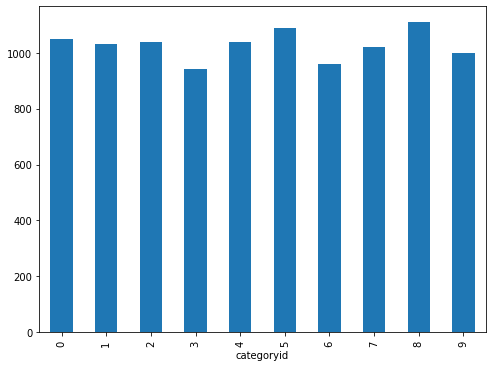

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('categoryid').title.count().plot.bar(ylim=0)
plt.show()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

10

In [0]:
for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_test = X[train_index], X[test_index]
    y_Train, y_test = y[train_index], y[test_index]   

In [15]:
ssh = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
ssh.get_n_splits(X_Train, y_Train)

10

In [0]:
for train_index, test_index in ssh.split(X_Train, y_Train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_cross = X[train_index], X[test_index]
    y_train, y_cross = y[train_index], y[test_index]  

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [0]:
count_vect = CountVectorizer()
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train)
X_cross_counts = count_vect.transform(X_cross)
X_test_counts = count_vect.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression

**Simple Logistic BOW model L2**

In [0]:
c=[0.001,0.01,0.1,1,10,100]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in c:
  logreg = LogisticRegression(C=i)
  logreg.fit(X_train_counts, y_train)
  y_train_pred = logreg.predict_proba(X_train_counts)[0:,]
  Train_AUC_BOW.append(roc_auc_score(y_train,y_train_pred, multi_class='ovr'))
  CrossVal_y_pred = logreg.predict_proba(X_cross_counts)[0:,]
  CrossVal_AUC_BOW.append(roc_auc_score(y_cross,CrossVal_y_pred,  multi_class='ovr'))

In [0]:
y_train.shape

(7398,)

In [0]:
y_train_pred.shape

(7398, 10)

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

In [0]:
from numpy import math

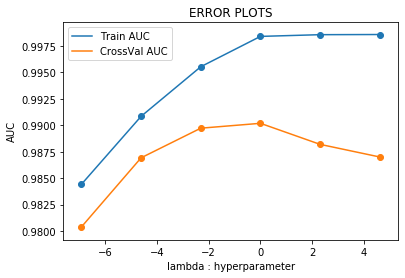

In [0]:
plt.plot(C, Train_AUC_BOW, label='Train AUC')
plt.scatter(C, Train_AUC_BOW)
plt.plot(C, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
print(pow(optimal_inverse_lambda,-1))

0.1


The optimal value of lambda is 0.1

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda)
Classifier.fit(X_train_counts, y_train)

In [0]:
auc_train_bow = roc_auc_score(y_train,Classifier.predict_proba(X_train_counts)[0:,], multi_class='ovr')
print ("AUC for Train set", auc_train_bow)

auc_test_bow = roc_auc_score(y_test,Classifier.predict_proba(X_test_counts)[0:,], multi_class='ovr')
print ("AUc for Test set",auc_test_bow)

AUC for Train set 0.9985814449271404
AUc for Test set 0.9939407150722662


In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(y_train,Classifier.predict(X_train_counts))
print (Train_mat)

Confusion Matrix of Train Data
[[351   0   0   0   1   0   0   0   0   0]
 [  0 782   0   3   0   0   0   0 147   1]
 [  0   0 810   0   0   0   0   1   0   2]
 [  0   0   0 839   0   0   0   0   1   0]
 [  0   0   0   0 369   0   1   0   0   0]
 [  0   0   0   0   1 603   0   0   0   0]
 [  0   1   0   0   0   1 870   0   0   0]
 [  0   0   2   1   0   0   0 915   0   5]
 [  0 130   0   3   0   0   0   0 657   1]
 [  0   0   0   0   0   0   0   3   0 897]]


In [0]:
ticks = df['category'].unique()

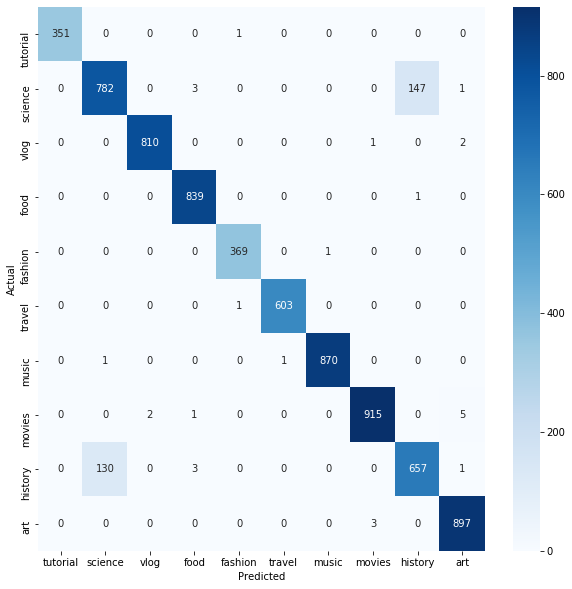

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Train_mat, annot=True, fmt='d',cmap='Blues', xticklabels=ticks, yticklabels=ticks)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_train,Classifier.predict(X_train_counts), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       1.00      1.00      1.00       352
     science       0.86      0.84      0.85       933
        vlog       1.00      1.00      1.00       813
        food       0.99      1.00      1.00       840
     fashion       0.99      1.00      1.00       370
      travel       1.00      1.00      1.00       604
       music       1.00      1.00      1.00       872
      movies       1.00      0.99      0.99       923
     history       0.82      0.83      0.82       791
         art       0.99      1.00      0.99       900

    accuracy                           0.96      7398
   macro avg       0.96      0.96      0.96      7398
weighted avg       0.96      0.96      0.96      7398



In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(y_test,Classifier.predict(X_test_counts))

Confusion Matrix of Test Data


In [0]:
print (Test_mat)


[[130   4  15   2   0   3  20   2   7  27]
 [  0 167   0   1   0   0   0   0  38   0]
 [  0   0 207   0   0   0   0   1   0   0]
 [  0   0   0 187   0   0   0   0   1   0]
 [  0   1   0   0 196   2   1   1   2   5]
 [  0   3   1   1   2 153   0   1  12  45]
 [  0   0   0   0   0   1 191   0   0   0]
 [  0   0   0   0   0   0   0 203   0   1]
 [  1  42   5   2   0   0   6   0 156  10]
 [  0   0   0   0   0   0   0   3   0 196]]


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,Classifier.predict(X_test_counts), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       0.99      0.62      0.76       210
     science       0.77      0.81      0.79       206
        vlog       0.91      1.00      0.95       208
        food       0.97      0.99      0.98       188
     fashion       0.99      0.94      0.97       208
      travel       0.96      0.70      0.81       218
       music       0.88      0.99      0.93       192
      movies       0.96      1.00      0.98       204
     history       0.72      0.70      0.71       222
         art       0.69      0.98      0.81       199

    accuracy                           0.87      2055
   macro avg       0.88      0.87      0.87      2055
weighted avg       0.88      0.87      0.87      2055



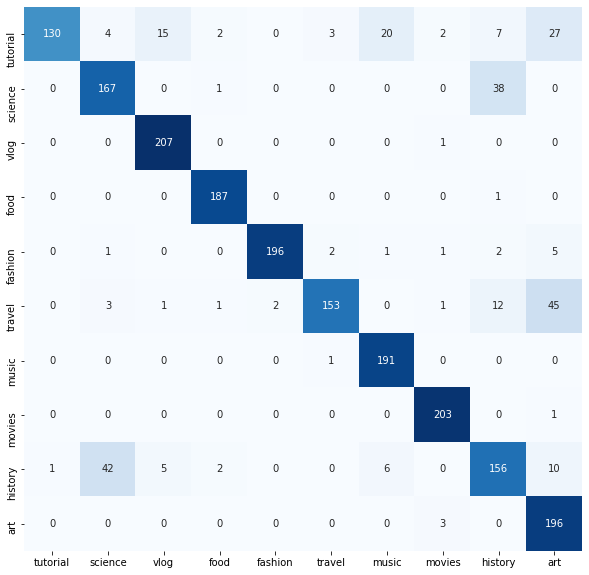

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(Test_mat, annot=True, cbar=False, fmt='g',cmap='Blues', xticklabels=ticks, yticklabels=ticks)

In [0]:
recall = np.diag(Test_mat) / np.sum(Test_mat, axis = 1)
precision = np.diag(Test_mat) / np.sum(Test_mat, axis = 0)

In [0]:
feature_names = count_vect.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[7], feature_names))
print("Top 10 negative class words")
print(prob_sorted[:10])
print("Top 10 positive class words")
print(prob_sorted[:-(11):-1])

Top 10 negative class words
[(-2.161420682081169, 'fiction'), (-1.8869989996572245, 'extra'), (-1.5656823898577115, 'movies'), (-1.3193986394645887, 'singapore'), (-1.1121887869541724, 'restaurant'), (-1.0493262934974106, 'vlogging'), (-1.0359628377741976, 'time'), (-1.0070505991908367, 'movie'), (-0.8966307079708055, 'trailers'), (-0.8864864229359545, 'made')]
Top 10 positive class words
[(6.786746738077416, 'travel'), (6.50977909882536, 'tourism'), (4.8779821768912806, 'tourist'), (3.598049028081689, 'bahamas'), (3.3328537926846478, 'traveling'), (2.7583107602337273, 'visit'), (2.7042142462406886, 'blog'), (2.6879613496703896, 'trip'), (2.2734658759559085, 'things'), (2.1800613418907635, 'travellers')]


**Logistic Regression with BOW model using L1 regularization**

In [0]:
c=[0.001,0.01,0.1,1,10,100]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in c:
  logreg = LogisticRegression(C=i, penalty='l1', solver='saga')
  logreg.fit(X_train_counts, y_train)
  y_train_pred = logreg.predict_proba(X_train_counts)[0:,]
  Train_AUC_BOW.append(roc_auc_score(y_train,y_train_pred, multi_class='ovr'))
  CrossVal_y_pred = logreg.predict_proba(X_cross_counts)[0:,]
  CrossVal_AUC_BOW.append(roc_auc_score(y_cross,CrossVal_y_pred,  multi_class='ovr'))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

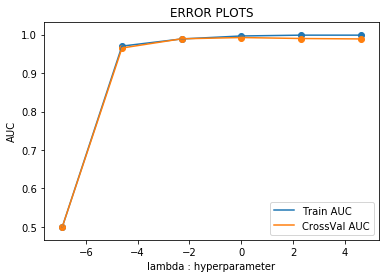

In [0]:
plt.plot(C, Train_AUC_BOW, label='Train AUC')
plt.scatter(C, Train_AUC_BOW)
plt.plot(C, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
print(pow(optimal_inverse_lambda,-1))

1.0


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1', solver='saga')
Classifier.fit(X_train_counts, y_train)

auc_train_bow = roc_auc_score(y_train,Classifier.predict_proba(X_train_counts)[0:,], multi_class='ovr')
print ("AUC for Train set", auc_train_bow)

auc_test_bow = roc_auc_score(y_test,Classifier.predict_proba(X_test_counts)[0:,], multi_class='ovr')
print ("AUc for Test set",auc_test_bow)

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(y_test,Classifier.predict(X_test_counts))
print (Test_mat)

Confusion Matrix of Test Data
[[116   2  16   3   0  37  26   2   4   4]
 [  0 170   0   1   0   5   2   0  26   2]
 [  0   0 202   0   1   3   0   1   0   1]
 [  0   0   0 188   0   0   0   0   0   0]
 [  0   0   0   0 193   7   3   2   1   2]
 [  0   0   1   0   2 191   1   1  12  10]
 [  0   0   0   0   0   1 189   0   1   1]
 [  0   0   1   0   0   0   0 199   0   4]
 [  0  65   3   2   2  11   7   0 129   3]
 [  0   0   1   0   2   5   1   3   1 186]]


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,Classifier.predict(X_test_counts), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       1.00      0.55      0.71       210
     science       0.72      0.83      0.77       206
        vlog       0.90      0.97      0.94       208
        food       0.97      1.00      0.98       188
     fashion       0.96      0.93      0.95       208
      travel       0.73      0.88      0.80       218
       music       0.83      0.98      0.90       192
      movies       0.96      0.98      0.97       204
     history       0.74      0.58      0.65       222
         art       0.87      0.93      0.90       199

    accuracy                           0.86      2055
   macro avg       0.87      0.86      0.86      2055
weighted avg       0.87      0.86      0.85      2055



**TFIDF Vectorizer LOGREG Model L2**

In [0]:
tf_idf=TfidfVectorizer(ngram_range=(1,2))

In [0]:
tf_idf.fit(X_train)
Train_TFIDF = tf_idf.transform(X_train)
CrossVal_TFIDF = tf_idf.transform(X_cross)
Test_TFIDF= tf_idf.transform(X_test)

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_TFIDF = []
CrossVal_AUC_TFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l2')
  logreg.fit(Train_TFIDF, y_train)
  Train_y_pred =  logreg.predict_proba(Train_TFIDF)[0:,]
  Train_AUC_TFIDF.append(roc_auc_score(y_train ,Train_y_pred, multi_class='ovr'))
  CrossVal_y_pred =  logreg.predict_proba(CrossVal_TFIDF)[0:,]
  CrossVal_AUC_TFIDF.append(roc_auc_score(y_cross,CrossVal_y_pred, multi_class='ovr'))

In [0]:
from sklearn.metrics import f1_score

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_F1_TFIDF = []
CrossVal_F1_TFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l2',multi_class='ovr')
  logreg.fit(Train_TFIDF, y_train)
  Train_predict = logreg.predict(Train_TFIDF)
  score1 = f1_score(y_train, Train_predict, average='micro')
  Train_F1_TFIDF.append(score1)
  Cross_predict = logreg.predict(CrossVal_TFIDF)
  score2 = f1_score(y_cross,Cross_predict,average='micro')
  CrossVal_F1_TFIDF.append(score2)

In [0]:
from numpy import math
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

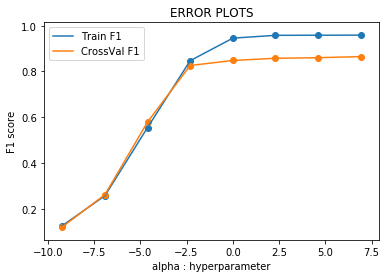

In [0]:
plt.plot(C, Train_F1_TFIDF, label='Train F1',)
plt.scatter(C, Train_F1_TFIDF)
plt.plot(C, CrossVal_F1_TFIDF, label='CrossVal F1')
plt.scatter(C, CrossVal_F1_TFIDF)
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("F1 score")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_F1_TFIDF.index(max(CrossVal_F1_TFIDF))]
print(pow(optimal_inverse_lambda,-1))

0.001


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2',multi_class='ovr')
Classifier.fit(Train_TFIDF, y_train)
Y_Pred = Classifier.predict(Test_TFIDF)
final_score = f1_score(y_test, Y_Pred, average='micro')

In [0]:
final_score

0.88661800486618

In [0]:
z=confusion_matrix(y_test, Y_Pred)

In [0]:
recall = np.diag(z) / np.sum(z, axis = 1)
precision = np.diag(z) / np.sum(z, axis = 0)

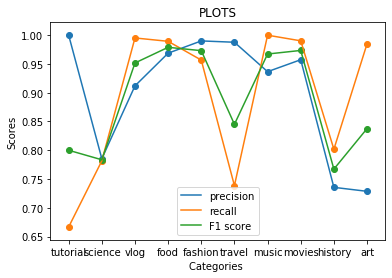

In [0]:
plt.plot(c,precision, label='precision')
plt.scatter(c,precision)
plt.plot(c,recall, label='recall')
plt.scatter(c,recall)
plt.plot(c,2*(precision * recall) / (precision + recall) , label='F1 score')
plt.scatter(c,2*(precision * recall) / (precision + recall))
plt.legend()
plt.xlabel("Categories ")
plt.ylabel("Scores")
plt.title("PLOTS")

plt.show()

In [0]:
c = df['category'].unique()

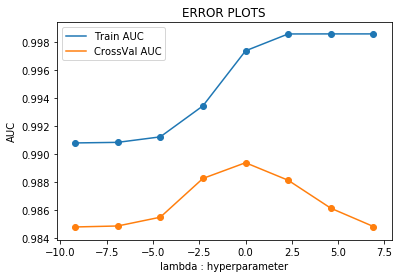

In [0]:
plt.plot(C, Train_AUC_TFIDF, label='Train AUC')
plt.scatter(C, Train_AUC_TFIDF)
plt.plot(C, CrossVal_AUC_TFIDF, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_TFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_TFIDF.index(max(CrossVal_AUC_TFIDF))]
print(pow(optimal_inverse_lambda,-1))

1.0


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(Train_TFIDF, y_train)

auc_train_tfidf = roc_auc_score(y_train,Classifier.predict_proba(Train_TFIDF)[0:,], multi_class='ovr')
print ("AUC for Train set", auc_train_tfidf)

auc_test_tfidf = roc_auc_score(y_test,Classifier.predict_proba(Test_TFIDF)[0:,], multi_class='ovr')
print ("AUc for Test set",auc_test_tfidf)

AUC for Train set 0.9973731992701849
AUc for Test set 0.9925867405034801


In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(y_test,Classifier.predict(Test_TFIDF))
print (Test_mat)

Confusion Matrix of Test Data
[[120  14  17   8   0   0  25   2  16   8]
 [  0 165   0   1   0   1   1   0  38   0]
 [  0   0 205   0   1   0   0   1   0   1]
 [  0   0   0 188   0   0   0   0   0   0]
 [  0   2   0   3 193   3   0   2   3   2]
 [  0   6   2  14   1 161   0   1  25   8]
 [  0   0   0   0   0   0 191   0   0   1]
 [  0   0   0   0   0   0   0 202   0   2]
 [  0  43   2   4   0   0   4   0 166   3]
 [  0   0   1   0   1   0   0   3   2 192]]


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,Classifier.predict(Test_TFIDF), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       1.00      0.57      0.73       210
     science       0.72      0.80      0.76       206
        vlog       0.90      0.99      0.94       208
        food       0.86      1.00      0.93       188
     fashion       0.98      0.93      0.96       208
      travel       0.98      0.74      0.84       218
       music       0.86      0.99      0.92       192
      movies       0.96      0.99      0.97       204
     history       0.66      0.75      0.70       222
         art       0.88      0.96      0.92       199

    accuracy                           0.87      2055
   macro avg       0.88      0.87      0.87      2055
weighted avg       0.88      0.87      0.86      2055



In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(y_train,Classifier.predict(Train_TFIDF))
print (Train_mat)

Confusion Matrix of Train Data
[[339   0   1   1   3   3   0   0   4   1]
 [  0 776   0   4   2   3   1   0 147   0]
 [  0   0 800   0   1   0   0   2   3   7]
 [  0   1   0 835   3   1   0   0   0   0]
 [  0   0   0   1 367   1   1   0   0   0]
 [  0   0   0   0   2 601   1   0   0   0]
 [  0   1   0   0   2   0 867   0   0   2]
 [  0   1   4   1   0   0   0 912   0   5]
 [  1 134   0   5   2   3   0   0 644   2]
 [  0   1   1   0   9   0   0  10   5 874]]


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_train,Classifier.predict(Train_TFIDF), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       1.00      0.96      0.98       352
     science       0.85      0.83      0.84       933
        vlog       0.99      0.98      0.99       813
        food       0.99      0.99      0.99       840
     fashion       0.94      0.99      0.96       370
      travel       0.98      1.00      0.99       604
       music       1.00      0.99      1.00       872
      movies       0.99      0.99      0.99       923
     history       0.80      0.81      0.81       791
         art       0.98      0.97      0.98       900

    accuracy                           0.95      7398
   macro avg       0.95      0.95      0.95      7398
weighted avg       0.95      0.95      0.95      7398



**TFIDF Vectorizer LogReg Model L1**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_TFIDF = []
CrossVal_AUC_TFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l1', solver='saga')
  logreg.fit(Train_TFIDF, y_train)
  Train_y_pred =  logreg.predict_proba(Train_TFIDF)[0:,]
  Train_AUC_TFIDF.append(roc_auc_score(y_train ,Train_y_pred, multi_class='ovr'))
  CrossVal_y_pred =  logreg.predict_proba(CrossVal_TFIDF)[0:,]
  CrossVal_AUC_TFIDF.append(roc_auc_score(y_cross,CrossVal_y_pred, multi_class='ovr'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_F1_TFIDF = []
CrossVal_F1_TFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l1',multi_class='ovr', solver='saga')
  logreg.fit(Train_TFIDF, y_train)
  Train_predict = logreg.predict(Train_TFIDF)
  score1 = f1_score(y_train, Train_predict, average='micro')
  Train_F1_TFIDF.append(score1)
  Cross_predict = logreg.predict(CrossVal_TFIDF)
  score2 = f1_score(y_cross,Cross_predict,average='micro')
  CrossVal_F1_TFIDF.append(score2)

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

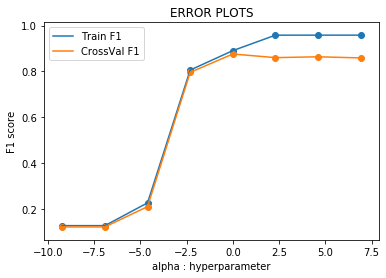

In [0]:
plt.plot(C, Train_F1_TFIDF, label='Train F1',)
plt.scatter(C, Train_F1_TFIDF)
plt.plot(C, CrossVal_F1_TFIDF, label='CrossVal F1')
plt.scatter(C, CrossVal_F1_TFIDF)
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("F1 score")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_F1_TFIDF.index(max(CrossVal_F1_TFIDF))]
print(pow(optimal_inverse_lambda,-1))

1.0


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1',multi_class='ovr', solver='saga')
Classifier.fit(Train_TFIDF, y_train)
Y_Pred = Classifier.predict(Test_TFIDF)
final_score = f1_score(y_test, Y_Pred, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [0]:
z=confusion_matrix(y_test, Y_Pred)
final_score

0.8145985401459854

In [0]:
recall = np.diag(z) / np.sum(z, axis = 1)
precision = np.diag(z) / np.sum(z, axis = 0)

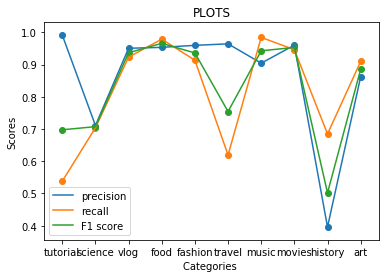

In [0]:
c= df['category'].unique()

plt.plot(c,precision, label='precision')
plt.scatter(c,precision)
plt.plot(c,recall, label='recall')
plt.scatter(c,recall)
plt.plot(c,2*(precision * recall) / (precision + recall) , label='F1 score')
plt.scatter(c,2*(precision * recall) / (precision + recall))
plt.legend()
plt.xlabel("Categories ")
plt.ylabel("Scores")
plt.title("PLOTS")

plt.show()

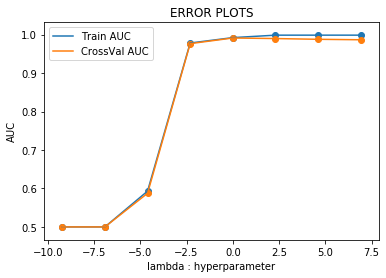

In [0]:
plt.plot(C, Train_AUC_TFIDF, label='Train AUC')
plt.scatter(C, Train_AUC_TFIDF)
plt.plot(C, CrossVal_AUC_TFIDF, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_TFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_TFIDF.index(max(CrossVal_AUC_TFIDF))]
print(pow(optimal_inverse_lambda,-1))

1.0


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1', solver='saga')
Classifier.fit(Train_TFIDF, y_train)

auc_train_tfidf = roc_auc_score(y_train,Classifier.predict_proba(Train_TFIDF)[0:,], multi_class='ovr')
print ("AUC for Train set", auc_train_tfidf)

auc_test_tfidf = roc_auc_score(y_test,Classifier.predict_proba(Test_TFIDF)[0:,], multi_class='ovr')
print ("AUc for Test set",auc_test_tfidf)

print('Confusion Matrix of Train Data')
Test_mat=confusion_matrix(y_train,Classifier.predict(Train_TFIDF))
print (Test_mat)

AUC for Train set 0.9921308438342276
AUc for Test set 0.9809435963911511
Confusion Matrix of Train Data
[[330   0   2   1   4  12   1   0   2   0]
 [  0 609   0   6   2  36   6   0 272   2]
 [  1   0 758   0   1  31   0   4   2  16]
 [  2   0   3 800   7  22   1   2   2   1]
 [  1   0   0   1 348  10   0   4   0   6]
 [  0   0   0   0   5 593   1   0   1   4]
 [  2   0   1   0   3  30 833   0   0   3]
 [  0   0   6   2   0  23   0 880   0  12]
 [  3 122   1   7   3  44   4   1 597   9]
 [  0   3   3   0  14  31   1  17   6 825]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_train,Classifier.predict(Train_TFIDF), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       0.97      0.94      0.96       352
     science       0.83      0.65      0.73       933
        vlog       0.98      0.93      0.96       813
        food       0.98      0.95      0.97       840
     fashion       0.90      0.94      0.92       370
      travel       0.71      0.98      0.83       604
       music       0.98      0.96      0.97       872
      movies       0.97      0.95      0.96       923
     history       0.68      0.75      0.71       791
         art       0.94      0.92      0.93       900

    accuracy                           0.89      7398
   macro avg       0.89      0.90      0.89      7398
weighted avg       0.90      0.89      0.89      7398



In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,Classifier.predict(Test_TFIDF), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       0.99      0.53      0.69       210
     science       0.77      0.62      0.69       206
        vlog       0.94      0.91      0.92       208
        food       0.97      0.97      0.97       188
     fashion       0.97      0.91      0.94       208
      travel       0.57      0.95      0.71       218
       music       0.91      0.98      0.94       192
      movies       0.96      0.94      0.95       204
     history       0.68      0.62      0.65       222
         art       0.85      0.92      0.88       199

    accuracy                           0.83      2055
   macro avg       0.86      0.84      0.83      2055
weighted avg       0.86      0.83      0.83      2055



In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(y_test,Classifier.predict(Test_TFIDF))
print (Test_mat)

Confusion Matrix of Test Data
[[112   2  10   1   1  66  15   0   2   1]
 [  0 127   0   2   0  13   1   0  61   2]
 [  0   0 190   0   1  11   0   2   0   4]
 [  0   0   1 183   1   3   0   0   0   0]
 [  0   0   0   0 190  10   0   4   0   4]
 [  0   0   0   0   1 207   0   0   1   9]
 [  1   0   0   0   0   2 188   0   0   1]
 [  0   0   2   0   0   4   0 192   0   6]
 [  0  34   0   3   0  40   2   0 137   6]
 [  0   1   0   0   2   7   1   3   1 184]]


**AVG-W2V model LogReg Model L2**

In [0]:
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50,workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [0]:
sent_vectors_train = []; 
for sent in tqdm(list_of_sentance_train): 
  sent_vec = np.zeros(50) 
  cnt_words =0; 
  for word in sent:
    if word in w2v_words:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
    sent_vec /= cnt_words
  sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)

100%|██████████| 7398/7398 [00:00<00:00, 11168.20it/s]


In [0]:
i=0
list_of_sentance_cv=[]
for sentance in X_cross:
    list_of_sentance_cv.append(sentance.split())

In [0]:
sent_vectors_cv = []; 
for sent in tqdm(list_of_sentance_cv): 
  sent_vec = np.zeros(50) 
  cnt_words =0; 
  for word in sent:
    if word in w2v_words:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
    sent_vec /= cnt_words
  sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)

100%|██████████| 822/822 [00:00<00:00, 10086.74it/s]


In [0]:
i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [0]:

sent_vectors_test = []; 
for sent in tqdm(list_of_sentance_test): 
  sent_vec = np.zeros(50) 
  cnt_words =0; 
  for word in sent:
    if word in w2v_words:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
    sent_vec /= cnt_words
  sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)

100%|██████████| 2055/2055 [00:00<00:00, 10626.53it/s]


**Logreg model using L2**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_W2V = []
CrossVal_AUC_W2V = []

for i in c:
  logreg = LogisticRegression(C=i,penalty='l2',multi_class='ovr')
  logreg.fit(sent_vectors_train, y_train)
  Train_predict = logreg.predict(sent_vectors_train)
  score1 = f1_score(y_train, Train_predict, average='micro')
  Train_AUC_W2V.append(score1)
  Cross_predict = logreg.predict(sent_vectors_cv)
  score2 = f1_score(y_cross,Cross_predict,average='micro')
  CrossVal_AUC_W2V.append(score2)

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

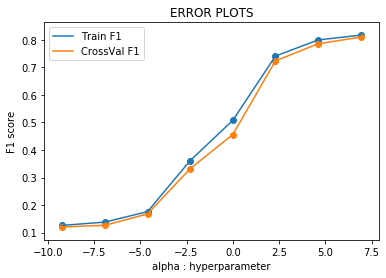

In [0]:
plt.plot(C, Train_AUC_W2V, label='Train F1',)
plt.scatter(C, Train_AUC_W2V)
plt.plot(C, CrossVal_AUC_W2V, label='CrossVal F1')
plt.scatter(C, CrossVal_AUC_W2V)
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("F1 score")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_W2V.index(max(CrossVal_AUC_W2V))]
print(pow(optimal_inverse_lambda,-1))

0.001


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2',multi_class='ovr')
Classifier.fit(sent_vectors_train, y_train)
Y_Pred = Classifier.predict(sent_vectors_test)
final_score = f1_score(y_test, Y_Pred, average='micro')

In [0]:
final_score

z= confusion_matrix(y_test, Y_Pred)
c = df['category'].unique()

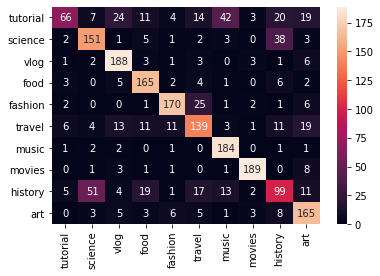

In [0]:

Train_cm = pd.DataFrame(z,index = c,columns = c)
sn.heatmap(Train_cm, annot=True,fmt="d")

In [0]:

recall = np.diag(z) / np.sum(z, axis = 1)
precision = np.diag(z) / np.sum(z, axis = 0)

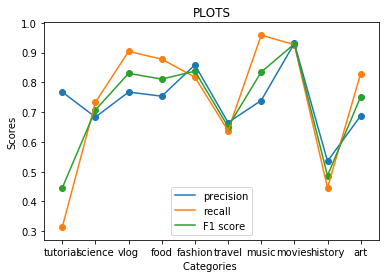

In [0]:

plt.plot(c,precision, label='precision')
plt.scatter(c,precision)
plt.plot(c,recall, label='recall')
plt.scatter(c,recall)
plt.plot(c,2*(precision * recall) / (precision + recall) , label='F1 score')
plt.scatter(c,2*(precision * recall) / (precision + recall))
plt.legend()
plt.xlabel("Categories ")
plt.ylabel("Scores")
plt.title("PLOTS")

plt.show()

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_W2V = []
CrossVal_AUC_W2V = []

for i in c:
  logreg = LogisticRegression(C=i,penalty='l2')
  logreg.fit(sent_vectors_train, y_train)
  Train_y_pred =  logreg.predict_proba(sent_vectors_train)[0:,]
  Train_AUC_W2V.append(roc_auc_score(y_train,Train_y_pred, multi_class='ovr'))
  CrossVal_y_pred =  logreg.predict_proba(sent_vectors_cv)[0:,]
  CrossVal_AUC_W2V.append(roc_auc_score(y_cross,CrossVal_y_pred, multi_class='ovr'))

In [0]:
from numpy import math
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

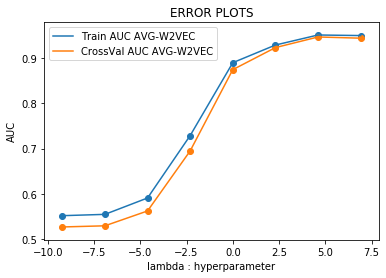

In [0]:

plt.plot(C, Train_AUC_W2V, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_W2V)
plt.plot(C, CrossVal_AUC_W2V, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_W2V)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_W2V.index(max(CrossVal_AUC_W2V))]
print(pow(optimal_inverse_lambda,-1))

0.01


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(sent_vectors_train, y_train)

auc_train_w2v = roc_auc_score(y_train,Classifier.predict_proba(sent_vectors_train)[0:,], multi_class='ovr')
print ("AUC for Train set", auc_train_w2v)

auc_test_w2v = roc_auc_score(y_test,Classifier.predict_proba(sent_vectors_test)[0:,], multi_class='ovr')
print ("AUc for Test set",auc_test_w2v)

AUC for Train set 0.9503398031106638
AUc for Test set 0.9224613394633409


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(y_train,Classifier.predict(sent_vectors_train))
print (Train_mat)

Confusion Matrix of Train Data
[[103  19  22  61  25  26  23  10  39  24]
 [  0 491   3  53   3  27  13   5 327  11]
 [  0  20 635  51   4  24   8  18  28  25]
 [  0  15  15 718   8  33  11   8  12  20]
 [  1  24   1  10 251  65   3   6   0   9]
 [  0  10   6  40  34 470  18   6   2  18]
 [  1  17   1  37   8  11 780   3   6   8]
 [  0   3  20   9   0  13   0 854   4  20]
 [  8  49  12  80   3  45  14   5 547  28]
 [  6  15  28 108  24  51   5  22  27 614]]


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_train,Classifier.predict(sent_vectors_train), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       0.87      0.29      0.44       352
     science       0.74      0.53      0.62       933
        vlog       0.85      0.78      0.82       813
        food       0.62      0.85      0.72       840
     fashion       0.70      0.68      0.69       370
      travel       0.61      0.78      0.69       604
       music       0.89      0.89      0.89       872
      movies       0.91      0.93      0.92       923
     history       0.55      0.69      0.61       791
         art       0.79      0.68      0.73       900

    accuracy                           0.74      7398
   macro avg       0.75      0.71      0.71      7398
weighted avg       0.76      0.74      0.73      7398



In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(y_test,Classifier.predict(sent_vectors_test))
print (Test_mat)

Confusion Matrix of Test Data
[[ 27  15   5  35   5  33  48   9  24   9]
 [  0 106   1  12   1   7   5   0  71   3]
 [  0   4 172   8   2   7   1   2   5   7]
 [  0   5   3 163   2   6   2   3   2   2]
 [  1  21   2   4 116  57   0   4   0   3]
 [  0   2  11  21  12 152   2  10   3   5]
 [  0   4   0   9   1   2 172   0   2   2]
 [  0   1   2   4   0   2   0 191   0   4]
 [  2  11   4  27   5  24  11   3 127   8]
 [  1   2   8  29   5  16   2   3   5 128]]


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,Classifier.predict(sent_vectors_test), target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       0.87      0.13      0.22       210
     science       0.62      0.51      0.56       206
        vlog       0.83      0.83      0.83       208
        food       0.52      0.87      0.65       188
     fashion       0.78      0.56      0.65       208
      travel       0.50      0.70      0.58       218
       music       0.71      0.90      0.79       192
      movies       0.85      0.94      0.89       204
     history       0.53      0.57      0.55       222
         art       0.75      0.64      0.69       199

    accuracy                           0.66      2055
   macro avg       0.70      0.66      0.64      2055
weighted avg       0.69      0.66      0.64      2055



**W2V model using L1 penalty**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_W2V = []
CrossVal_AUC_W2V = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l1', solver='saga')
  logreg.fit(sent_vectors_train, y_train)
  Train_y_pred =  logreg.predict_proba(sent_vectors_train)[0:,]
  Train_AUC_W2V.append(roc_auc_score(y_train,Train_y_pred, multi_class='ovr'))
  CrossVal_y_pred =  logreg.predict_proba(sent_vectors_cv)[0:,]
  CrossVal_AUC_W2V.append(roc_auc_score(y_cross,CrossVal_y_pred, multi_class='ovr'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

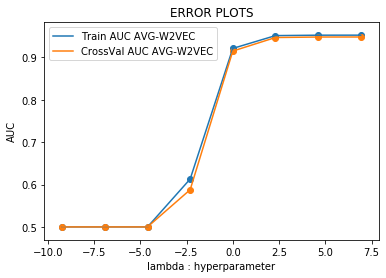

In [0]:
plt.plot(C, Train_AUC_W2V, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_W2V)
plt.plot(C, CrossVal_AUC_W2V, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_W2V)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_W2V.index(max(CrossVal_AUC_W2V))]
print(pow(optimal_inverse_lambda,-1))

0.001


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1', solver='saga')
Classifier.fit(sent_vectors_train, y_train)

auc_train_w2v = roc_auc_score(y_train,Classifier.predict_proba(sent_vectors_train)[0:,], multi_class='ovr')
print ("AUC for Train set", auc_train_w2v)

auc_test_w2v = roc_auc_score(y_test,Classifier.predict_proba(sent_vectors_test)[0:,], multi_class='ovr')
print ("AUc for Test set",auc_test_w2v)

AUC for Train set 0.9523870632501221
AUc for Test set 0.9293590770164826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(y_train,Classifier.predict(sent_vectors_train))
print (Train_mat)

Confusion Matrix of Train Data
[[  0  64  30  55  25   8  31  11  76  52]
 [  0 529   5  37   3  15  11   1 315  17]
 [  0  24 645  28   3   7   9  20  42  35]
 [  0  13  13 711   8  15  10   6  32  32]
 [  0  37   1  15 219  73   3   4  10   8]
 [  0  18  10  36  21 438  19   0  24  38]
 [  0  11   2  25   9   8 779   1  19  18]
 [  0   0  18   8   0   6   2 857  12  20]
 [  0  60  14  57   3  27  14   3 577  36]
 [  0  13  31 100  24  28  14  24  42 624]]


In [0]:
print('Confusion Matrix of Train Data')
Test_mat=confusion_matrix(y_test,Classifier.predict(sent_vectors_test))
print (Test_mat)

Confusion Matrix of Train Data
[[  0  25  10  24   5   9  68   3  47  19]
 [  0 114   2  10   1   5   5   1  65   3]
 [  0   4 175   6   1   1   3   3   7   8]
 [  0   5   3 161   2   4   3   2   5   3]
 [  0  23   2   6 103  62   1   3   4   4]
 [  0   2  21  14   8 121  15   4  17  16]
 [  0   4   0   4   1   1 172   0   4   6]
 [  0   0   3   3   0   1   1 189   1   6]
 [  0  19   5  24   4  12  15   2 131  10]
 [  0   2   5  28   5   7   6   4   6 136]]


***TFIDF AVG W2V model*** 

In [0]:
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

In [0]:
tfidf_feat = tf_idf.get_feature_names()
AVG_TFIDF = []
row=0;
for sent in tqdm(list_of_sentance_train): 
    sent_vec = np.zeros(50)  
    weight_sum =0; 
    for word in sent: 
        if((word in w2v_words)&(word in tfidf_feat)):
            vec = w2v_model.wv[word]
            TF_IDF = Train_TFIDF[row , tfidf_feat.index(word)]
            sent_vec += (vec * TF_IDF)
            weight_sum += TF_IDF
    if weight_sum != 0:
        sent_vec /= weight_sum
    AVG_TFIDF.append(sent_vec)
    row+=1;

In [0]:
i=0
list_of_sentance_cv=[]
for sentance in X_cross:
    list_of_sentance_cv.append(sentance.split())

In [0]:
tfidf_feat = tf_idf.get_feature_names()
AVG_TFIDF_cv = []
row=0;
for sent in tqdm(list_of_sentance_cv): 
    sent_vec = np.zeros(50)  
    weight_sum =0; 
    for word in sent: 
        if((word in w2v_words)&(word in tfidf_feat)):
            vec = w2v_model.wv[word]
            TF_IDF = Train_TFIDF[row , tfidf_feat.index(word)]
            sent_vec += (vec * TF_IDF)
            weight_sum += TF_IDF
    if weight_sum != 0:
        sent_vec /= weight_sum
    AVG_TFIDF_cv.append(sent_vec)
    row+=1;

In [0]:
i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [0]:

tfidf_feat = tf_idf.get_feature_names()
AVG_TFIDF_test = []
row=0;
for sent in tqdm(list_of_sentance_test): 
    sent_vec = np.zeros(50)  
    weight_sum =0; 
    for word in sent: 
        if((word in w2v_words)&(word in tfidf_feat)):
            vec = w2v_model.wv[word]
            TF_IDF = Train_TFIDF[row , tfidf_feat.index(word)]
            sent_vec += (vec * TF_IDF)
            weight_sum += TF_IDF
    if weight_sum != 0:
        sent_vec /= weight_sum
    AVG_TFIDF_test.append(sent_vec)
    row+=1;

**TFIDF AVG W2V LogReg model using L2 penalty** 

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_AVGTFIDF = []
CrossVal_AUC_AVGTFIDF = []

for i in c:
  logreg = LogisticRegression(C=i,penalty='l2')
  logreg.fit(AVG_TFIDF, y_train)
  Train_y_pred =  logreg.predict_proba(AVG_TFIDF)[0:,]
  Train_AUC_AVGTFIDF.append(roc_auc_score(y_train,Train_y_pred, multi_class='ovr'))
  CrossVal_y_pred =  logreg.predict_proba(AVG_TFIDF_cv)[0:,]
  CrossVal_AUC_AVGTFIDF.append(roc_auc_score(y_cross,CrossVal_y_pred, multi_class='ovr'))

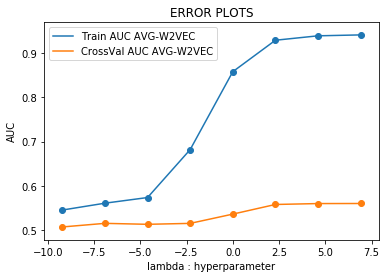

In [0]:
plt.plot(C, Train_AUC_AVGTFIDF, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_AVGTFIDF)
plt.plot(C, CrossVal_AUC_AVGTFIDF, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_AVGTFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_AVGTFIDF.index(max(CrossVal_AUC_AVGTFIDF))]
print(pow(optimal_inverse_lambda,-1))

0.001


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(AVG_TFIDF, y_train)

auc_train_tfidf_avg = roc_auc_score(y_train,Classifier.predict_proba(AVG_TFIDF)[0:,], multi_class='ovr')
print (auc_train_tfidf_avg)

auc_test_tfidf_avg = roc_auc_score(y_test,Classifier.predict_proba(AVG_TFIDF_test)[0:,], multi_class='ovr')
print (auc_test_tfidf_avg)

0.9419334017431975
0.5604952654942104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**TFIDF AVG W2V L1 penalty**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_AVGTFIDF = []
CrossVal_AUC_AVGTFIDF = []

for i in c:
  logreg = LogisticRegression(C=i,penalty='l1', solver='saga')
  logreg.fit(AVG_TFIDF, y_train)
  Train_y_pred =  logreg.predict_proba(AVG_TFIDF)[0:,]
  Train_AUC_AVGTFIDF.append(roc_auc_score(y_train,Train_y_pred, multi_class='ovr'))
  CrossVal_y_pred =  logreg.predict_proba(AVG_TFIDF_cv)[0:,]
  CrossVal_AUC_AVGTFIDF.append(roc_auc_score(y_cross,CrossVal_y_pred, multi_class='ovr'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

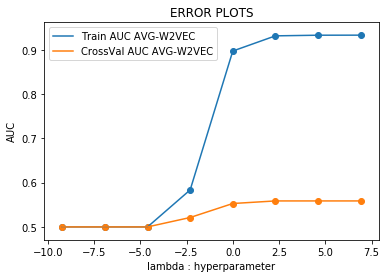

In [0]:
plt.plot(C, Train_AUC_AVGTFIDF, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_AVGTFIDF)
plt.plot(C, CrossVal_AUC_AVGTFIDF, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_AVGTFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_AVGTFIDF.index(max(CrossVal_AUC_AVGTFIDF))]
print(pow(optimal_inverse_lambda,-1))

0.01


In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(AVG_TFIDF, y_train)

auc_train_tfidf_avg = roc_auc_score(y_train,Classifier.predict_proba(AVG_TFIDF)[0:,], multi_class='ovr')
print (auc_train_tfidf_avg)

auc_test_tfidf_avg = roc_auc_score(y_test,Classifier.predict_proba(AVG_TFIDF_test)[0:,], multi_class='ovr')
print (auc_test_tfidf_avg)

0.9398652233305246
0.5612249882110449


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
x = PrettyTable()

x.field_names = ["VECTORIZER", "REGULARIZATION", "HYPER PARAMETER", "AREA UNDER CURVE"]

x.add_row(["BOW","L2",0.1,0.99848])
x.add_row(["BOW","L1",1,0.99008])
x.add_row(["TFIDF","L2",0.001,0.99251])
x.add_row(["TFIDF","L1",1,0.98032])
x.add_row(["AVG-W2VEC","L2",0.01,0.92241])
x.add_row(["AVG-W2VEC","L1",0.001,0.92935])
x.add_row(["TFIDF-AVG W2VEC","L2",0.001,0.56042])
x.add_row(["TFIDF-AVG W2VEC","L1",0.01,0.56122])
print(x)

+-----------------+----------------+-----------------+------------------+
|    VECTORIZER   | REGULARIZATION | HYPER PARAMETER | AREA UNDER CURVE |
+-----------------+----------------+-----------------+------------------+
|       BOW       |       L2       |       0.1       |     0.99848      |
|       BOW       |       L1       |        1        |     0.99008      |
|      TFIDF      |       L2       |      0.001      |     0.99251      |
|      TFIDF      |       L1       |        1        |     0.98032      |
|    AVG-W2VEC    |       L2       |       0.01      |     0.92241      |
|    AVG-W2VEC    |       L1       |      0.001      |     0.92935      |
| TFIDF-AVG W2VEC |       L2       |      0.001      |     0.56042      |
| TFIDF-AVG W2VEC |       L1       |       0.01      |     0.56122      |
+-----------------+----------------+-----------------+------------------+
